# Data Analysis - FIB-SEM Datasets
* Goal: identify changes occurred across different time points

In [1]:
import os, sys, glob
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pprint

## 01 Compile data into single .csv file for each label

In [2]:
mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

path = os.path.join(mainpath, folder, data_folder)
print(path)

folders = ['cell_membrane', 'nucleus', 'mito', 'cristae', 'inclusion', 'ER']

D:\PerlmutterData\segmentation_compiled_export\data


In [3]:
target_list = glob.glob(os.path.join(path, 'compile', '*.csv'))
target_list = [os.path.basename(x) for x in target_list]
target_list = [os.path.splitext(x)[0] for x in target_list]
print(target_list)

['cell_membrane', 'cristae', 'ER', 'inclusion', 'mito', 'nodes', 'nucleus', 'points', 'segments_s']


In [4]:
file_meta = {
    'data_d00_batch01_loc01': 0,
    'data_d00_batch02_loc02': 0,
    'data_d00_batch02_loc03': 0,
    'data_d07_batch01_loc01': 7, 
    'data_d07_batch02_loc01': 7,
    'data_d07_batch02_loc02': 7, 
    'data_d14_batch01_loc01': 14, 
    'data_d17_batch01_loc01': 17,
    'data_d21_batch01_loc01': 21,
}


In [5]:
for i in folders:
    file_list = glob.glob(os.path.join(path, 'raw', i, '*.csv'))
    
    if not i in target_list:
        df = pd.DataFrame()

        for j in file_list:    
            data_temp = pd.read_csv(j, header = 1)
            
            filename_tmp = os.path.basename(j)
            
            # add filename
            data_temp['filename'] = filename_tmp
            
            # add day
            filename_noext = os.path.splitext(filename_tmp)[0]
            pattern = re.compile("data_d[0-9][0-9]_batch[0-9][0-9]_loc[0-9][0-9]")
            original_filename = pattern.search(filename_noext).group(0)
            day_tmp = file_meta[original_filename]
            
            data_temp['day'] = day_tmp
            
            df = df.append(data_temp, ignore_index = True)
            
        display(df)
        df.to_csv(os.path.join(path, 'compile', i + '.csv'))
    

## 02 Load data

###  02-01 Calculate mean and tota|l volumn for mito, cristate, ER and inclusion

In [6]:
df_mito = pd.read_csv(os.path.join(path, 'compile', 'mito' + '.csv'))
df_mito['Volume3d_µm^3'] = df_mito['Volume3d']/1e9
df_mito['Area3d_µm^2'] = df_mito['Area3d']/1e6

df_mito_sum_grouped = df_mito.groupby(['day', 'filename']).sum().reset_index()
df_mito_mean_grouped = df_mito.groupby(['day', 'filename']).mean().reset_index()

df_cristae = pd.read_csv(os.path.join(path, 'compile', 'cristae' + '.csv'))
df_cristae['Volume3d_µm^3'] = df_cristae['Volume3d']/1e9
df_cristae['Area3d_µm^2'] = df_cristae['Area3d']/1e6

df_cristae_sum_grouped = df_cristae.groupby(['day', 'filename']).sum().reset_index()
df_cristae_mean_grouped = df_cristae.groupby(['day', 'filename']).mean().reset_index()

df_ER = pd.read_csv(os.path.join(path, 'compile', 'ER' + '.csv'))
df_ER['Volume3d_µm^3'] = df_ER['Volume3d']/1e9
df_ER['Area3d_µm^2'] = df_ER['Area3d']/1e6

df_ER_sum_grouped = df_ER.groupby(['day', 'filename']).sum().reset_index()
df_ER_mean_grouped = df_ER.groupby(['day', 'filename']).mean().reset_index()

df_inclusion = pd.read_csv(os.path.join(path, 'compile', 'inclusion' + '.csv'))
df_inclusion['Volume3d_µm^3'] = df_inclusion['Volume3d']/1e9
df_inclusion['Area3d_µm^2'] = df_inclusion['Area3d']/1e6

df_inclusion_sum_grouped = df_inclusion.groupby(['day', 'filename']).sum().reset_index()
df_inclusion_mean_grouped = df_inclusion.groupby(['day', 'filename']).mean().reset_index()

### 02-02 Calculate the total volume for cell membrane and nucleus

In [7]:
df_nucleus = pd.read_csv(os.path.join(path, 'compile', 'nucleus' + '.csv'))
df_nucleus['Volume3d_µm^3'] = df_nucleus['Volume3d']/1e9
df_nucleus['Area3d_µm^2'] = df_nucleus['Area3d']/1e6
df_nucleus_sum_grouped = df_nucleus.groupby(['day', 'filename']).sum().reset_index()

In [8]:
df_cell_membrane = pd.read_csv(os.path.join(path, 'compile', 'cell_membrane' + '.csv'))
df_cell_membrane['Volume3d_µm^3'] = df_cell_membrane['Volume3d']/1e9
df_cell_membrane['Area3d_µm^2'] = df_cell_membrane['Area3d']/1e6
df_cell_membrane_sum_grouped = df_cell_membrane.groupby(['day', 'filename']).sum().reset_index()

In [9]:
df_cell_membrane_sum_grouped

,day,filename,Unnamed: 0,Volume3d,Area3d,BaryCenterX,BaryCenterY,BaryCenterZ,Mean,index,Volume3d_µm^3,Area3d_µm^2
0,0,data_d00_batch01_loc01_cell_membrane.csv,0,1.596130e+12,1.079330e+09,12918.30,2252.73,11759.30,1,1,1596.130000,1079.330000
1,0,data_d00_batch02_loc02_cell_membrane.csv,1,1.948900e+12,9.889220e+08,9006.11,3391.34,9221.07,1,1,1948.900000,988.922000
2,0,data_d00_batch02_loc03_cell_membrane.csv,2,8.628210e+11,6.087890e+08,11467.20,2299.98,7031.91,1,1,862.821000,608.789000
3,7,data_d07_batch01_loc01_cell_membrane.csv,3,9.045550e+11,5.918870e+08,14932.10,3010.33,6637.82,1,1,904.555000,591.887000
4,7,data_d07_batch02_loc01_cell_membrane.csv,4,1.233220e+12,7.556690e+08,9333.23,2766.17,7790.46,1,1,1233.220000,755.669000
5,7,data_d07_batch02_loc02_cell_membrane.csv,5,1.558180e+12,9.603180e+08,11912.20,2477.45,8127.90,1,1,1558.180000,960.318000
6,14,data_d14_batch01_loc01_cell_membrane.csv,6,3.303970e+12,1.362340e+09,12857.50,4242.07,10056.70,1,1,3303.970000,1362.340000
7,17,data_d17_batch01_loc01_01_cell_membrane.csv,7,1.339080e+12,7.927630e+08,8731.14,3288.59,4879.19,1,1,1339.080000,792.763000
8,17,data_d17_batch01_loc01_02_cell_membrane.csv,8,7.508310e+11,5.684290e+08,15772.00,2466.69,16203.10,1,1,750.831000,568.429000
9,21,data_d21_batch01_loc01_cell_membrane.csv,19,1.843051e+12,1.168280e+09,29974.20,7502.07,12179.07,2,3,1843.051418,1168.280059


### 02-03 Calculate the volume of cytoplasm

In [10]:
df_cyto = pd.DataFrame()
df_cyto['filename'] = df_cell_membrane_sum_grouped['filename']
df_cyto['Volume3d_µm^3'] = df_cell_membrane_sum_grouped['Volume3d_µm^3'] - df_nucleus_sum_grouped['Volume3d_µm^3']
display(df_cyto)

,filename,Volume3d_µm^3
0,data_d00_batch01_loc01_cell_membrane.csv,1246.356000
1,data_d00_batch02_loc02_cell_membrane.csv,1300.943000
2,data_d00_batch02_loc03_cell_membrane.csv,680.671000
3,data_d07_batch01_loc01_cell_membrane.csv,519.512000
4,data_d07_batch02_loc01_cell_membrane.csv,875.936000
5,data_d07_batch02_loc02_cell_membrane.csv,1062.249000
6,data_d14_batch01_loc01_cell_membrane.csv,2851.499000
7,data_d17_batch01_loc01_01_cell_membrane.csv,844.659000
8,data_d17_batch01_loc01_02_cell_membrane.csv,496.472000
9,data_d21_batch01_loc01_cell_membrane.csv,1519.363418


### 02-03 Omit unhealthy data or data with poor quality 

In [11]:
omit_data = ['data_d00_batch02_loc02', 
             'data_d17_batch01_loc01_01', 
             'data_d17_batch01_loc01_02']
for omit in omit_data: 
    df_mito = df_mito.loc[df_mito['filename']!= omit+ '_mito.csv']
    df_mito_sum_grouped = df_mito_sum_grouped.loc[df_mito_sum_grouped['filename']!=omit+ '_mito.csv']
    df_mito_mean_grouped = df_mito_mean_grouped.loc[df_mito_mean_grouped['filename']!=omit+ '_mito.csv']
    df_cristae = df_cristae.loc[df_cristae['filename']!=omit+ '_cristae.csv']
    df_cristae_sum_grouped = df_cristae_sum_grouped.loc[df_cristae_sum_grouped['filename']!=omit+ '_cristae.csv']
    df_cristae_mean_grouped = df_cristae_mean_grouped.loc[df_cristae_mean_grouped['filename']!=omit+ '_cristae.csv']
    df_ER = df_ER.loc[df_ER['filename']!=omit+ '_ER.csv']
    df_ER_sum_grouped = df_ER_sum_grouped.loc[df_ER_sum_grouped['filename']!=omit+ '_ER.csv']
    df_ER_mean_grouped = df_ER_mean_grouped.loc[df_ER_mean_grouped['filename']!=omit+ '_ER.csv']
    df_inclusion = df_inclusion.loc[df_inclusion['filename']!=omit+'_inclusion.csv']
    df_inclusion_sum_grouped = df_inclusion_sum_grouped.loc[df_inclusion_sum_grouped['filename']!=omit+'_inclusion.csv']
    df_inclusion_mean_grouped = df_inclusion_mean_grouped.loc[df_inclusion_mean_grouped['filename']!=omit+'_inclusion.csv']
    df_nucleus = df_nucleus.loc[df_nucleus['filename']!=omit+'_nucleus.csv']
    df_nucleus_sum_grouped = df_nucleus_sum_grouped.loc[df_nucleus_sum_grouped['filename']!=omit+'_nucleus.csv']
    df_cell_membrane = df_cell_membrane.loc[df_cell_membrane['filename']!=omit+'_cell_membrane.csv']
    df_cell_membrane_sum_grouped = df_cell_membrane_sum_grouped.loc[df_cell_membrane_sum_grouped['filename']!=omit+'_cell_membrane.csv']
    df_cyto = df_cyto.loc[df_cyto['filename']!=omit+'_cell_membrane.csv']


In [12]:
df_mito = df_mito.reset_index(drop=True)
df_mito_sum_grouped = df_mito_sum_grouped.reset_index(drop=True)
df_mito_mean_grouped = df_mito_mean_grouped.reset_index(drop=True)
df_cristae = df_cristae.reset_index(drop=True)
df_cristae_sum_grouped = df_cristae_sum_grouped.reset_index(drop=True)
df_cristae_mean_grouped = df_cristae_mean_grouped.reset_index(drop=True)
df_ER = df_ER.reset_index(drop=True)
df_ER_sum_grouped = df_ER_sum_grouped.reset_index(drop=True)
df_ER_mean_grouped = df_ER_mean_grouped.reset_index(drop=True)
df_inclusion = df_inclusion.reset_index(drop=True)
df_inclusion_sum_grouped = df_inclusion_sum_grouped.reset_index(drop=True)
df_inclusion_mean_grouped = df_inclusion_mean_grouped.reset_index(drop=True)
df_nucleus = df_nucleus.reset_index(drop=True)
df_nucleus_sum_grouped = df_nucleus_sum_grouped.reset_index(drop=True)
df_cell_membrane = df_cell_membrane.reset_index(drop=True)
df_cell_membrane_sum_grouped = df_cell_membrane_sum_grouped.reset_index(drop=True)
df_cyto = df_cyto.reset_index(drop=True)

In [13]:
df_mito.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'mito.csv'))
df_mito_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'mito_sum_volume.csv'))
df_mito_mean_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'mito_mean_volume.csv'))

df_cristae.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cristae.csv'))
df_cristae_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cristae_sum_volume.csv'))
df_cristae_mean_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cristae_mean_volume.csv'))

df_ER.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'ER.csv'))
df_ER_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'ER_sum_volume.csv'))
df_ER_mean_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'ER_mean_volume.csv'))

df_inclusion.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'inclusion.csv'))
df_inclusion_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'inclusion_sum_volume.csv'))
df_inclusion_mean_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'inclusion_mean_volume.csv'))

df_nucleus.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'nucleus.csv'))
df_nucleus_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'nucleus_sum_volume.csv'))

df_cell_membrane.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cell_membrane_volume.csv'))
df_cell_membrane_sum_grouped.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cell_membrane_sum_volume.csv'))
df_cyto.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cytoplasm_sum_volume.csv'))

In [14]:
df_mito_sum_grouped

,day,filename,Unnamed: 0,Volume3d,Area3d,BaryCenterX,BaryCenterY,BaryCenterZ,Mean,index,Volume3d_µm^3,Area3d_µm^2
0,0,data_d00_batch01_loc01_mito.csv,73536,3.291229e+11,2.539146e+09,4.412798e+06,1.752588e+06,3.749035e+06,73920,73920,329.122874,2539.146333
1,0,data_d00_batch02_loc03_mito.csv,212553,1.032135e+11,1.046297e+09,2.396187e+06,4.960812e+05,1.438862e+06,25651,25651,103.213467,1046.297110
2,7,data_d07_batch01_loc01_mito.csv,152524,4.311803e+10,4.071999e+08,2.133180e+06,3.195854e+05,6.401796e+05,9316,9316,43.118028,407.199865
3,7,data_d07_batch02_loc01_mito.csv,238545,8.782269e+10,8.276837e+08,1.741065e+06,4.481467e+05,1.306034e+06,17391,17391,87.822689,827.683718
4,7,data_d07_batch02_loc02_mito.csv,280961,9.268865e+10,1.004008e+09,1.846277e+06,4.814639e+05,1.180709e+06,18336,18336,92.688649,1004.008391
5,14,data_d14_batch01_loc01_mito.csv,675264,3.291229e+11,2.539146e+09,4.412798e+06,1.752588e+06,3.749035e+06,73920,73920,329.122874,2539.146333
6,21,data_d21_batch01_loc01_mito.csv,529893,1.186933e+11,1.052322e+09,2.373710e+06,5.636736e+05,2.038019e+06,27495,27495,118.693299,1052.321567


### 02-04 Compile total volume of mito, cristate, ER and inclusion into one table
1. raw value
2. normalized by the total volume of cytoplasm

In [15]:
df_sum_compiled = pd.DataFrame()
df_sum_compiled[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
df_sum_compiled['day'] = df_sum_compiled['day'].astype('int8')
df_sum_compiled[['mito_Volume3d_µm^3', 'mito_Area3d_µm^2']] = df_mito_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_sum_compiled[['cristae_Volume3d_µm^3', 'cristae_Area3d_µm^2']] = df_cristae_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_sum_compiled[['ER_Volume3d_µm^3', 'ER_Area3d_µm^2']] = df_ER_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]

df_inclusion_sum_tmp = df_inclusion_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_inclusion_sum_fill = pd.DataFrame([[0, 0]], columns = ['Volume3d_µm^3', 'Area3d_µm^2'])
df_inclusion_sum_tmp = df_inclusion_sum_fill.append(df_inclusion_sum_tmp, ignore_index = True)

df_sum_compiled[['inclusion_Volume3d_µm^3', 'inclusion_Area3d_µm^2']] = df_inclusion_sum_tmp
df_sum_compiled

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,329.122874,2539.146333,125.122262,9500.149162,40.627818,1748.669052,0.000000,0.000000
1,data_d00_batch02_loc03_cell_membrane.csv,0,103.213467,1046.297110,45.285632,3377.390519,23.918685,1004.646307,1.593595,19.121338
2,data_d07_batch01_loc01_cell_membrane.csv,7,43.118028,407.199865,17.211288,1273.696454,13.668791,499.139195,14.697196,116.219870
3,data_d07_batch02_loc01_cell_membrane.csv,7,87.822689,827.683718,35.413844,2649.040363,46.204013,1553.697695,9.862896,63.222781
4,data_d07_batch02_loc02_cell_membrane.csv,7,92.688649,1004.008391,39.713913,2883.003923,32.011120,1206.067670,3.755246,53.607291
5,data_d14_batch01_loc01_cell_membrane.csv,14,329.122874,2539.146333,125.122262,9500.149162,144.093364,5380.226705,456.518559,742.825330
6,data_d21_batch01_loc01_cell_membrane.csv,21,118.693299,1052.321567,48.355537,3618.926789,41.996704,1566.584143,85.987873,300.281775


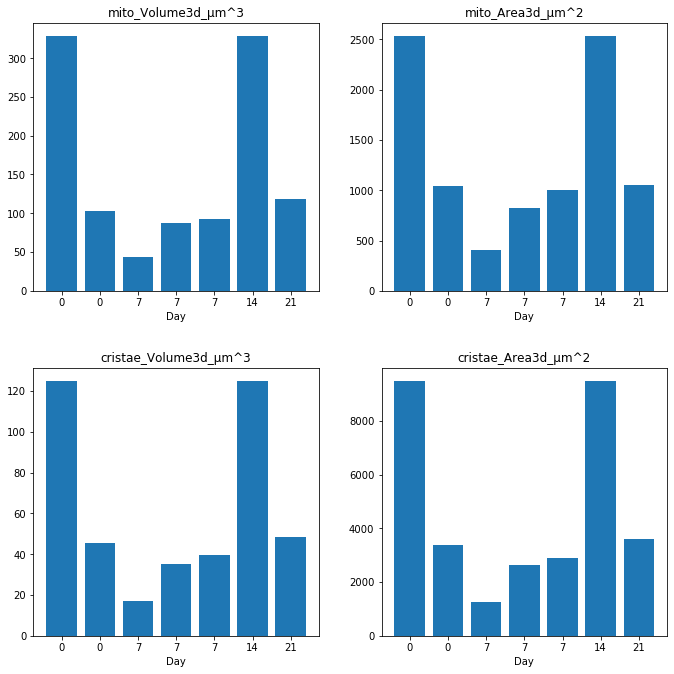

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled.index, 
                  df_sum_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_sum_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)


mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'mito_cristae_totoal_volume_area.png'))
plt.show()

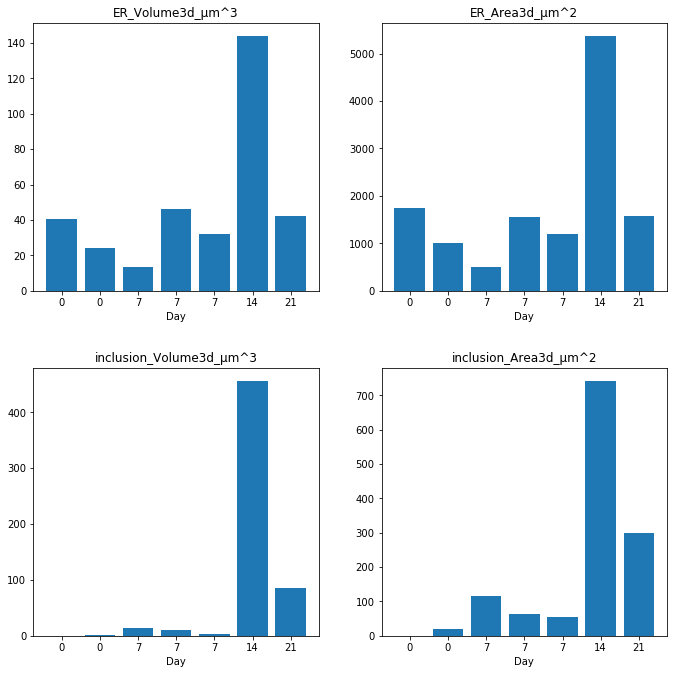

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled.index, 
                  df_sum_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_sum_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'ER_inclusion_totoal_volume_area.png'))
plt.show()

In [18]:
df_sum_compiled_normalized = pd.DataFrame()
df_sum_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
cal_tmp = df_sum_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)
df_sum_compiled_normalized = pd.concat([df_sum_compiled_normalized, cal_tmp], axis=1)
df_sum_compiled_normalized

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,0.264068,2.037256,0.100390,7.622340,0.032597,1.403025,0.000000,0.000000
1,data_d00_batch02_loc03_cell_membrane.csv,0,0.151635,1.537155,0.066531,4.961855,0.035140,1.475965,0.002341,0.028092
2,data_d07_batch01_loc01_cell_membrane.csv,7,0.082997,0.783812,0.033130,2.451717,0.026311,0.960785,0.028290,0.223710
3,data_d07_batch02_loc01_cell_membrane.csv,7,0.100262,0.944913,0.040430,3.024240,0.052748,1.773757,0.011260,0.072177
4,data_d07_batch02_loc02_cell_membrane.csv,7,0.087257,0.945172,0.037387,2.714057,0.030135,1.135391,0.003535,0.050466
5,data_d14_batch01_loc01_cell_membrane.csv,14,0.115421,0.890460,0.043879,3.331633,0.050532,1.886806,0.160098,0.260503
6,data_d21_batch01_loc01_cell_membrane.csv,21,0.078120,0.692607,0.031826,2.381870,0.027641,1.031079,0.056595,0.197637


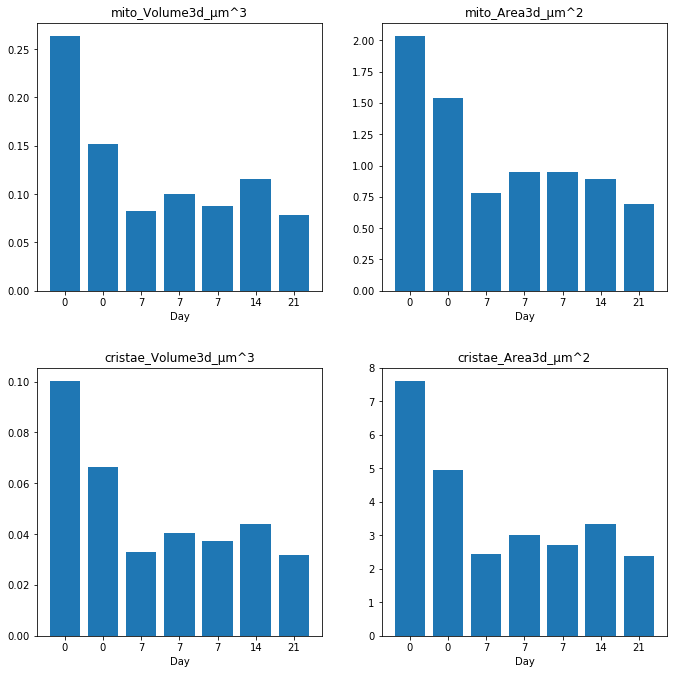

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled_normalized.index, 
                  df_sum_compiled_normalized.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_sum_compiled_normalized.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'mito_cristae_normalized_totoal_volume_area.png'))
plt.show()

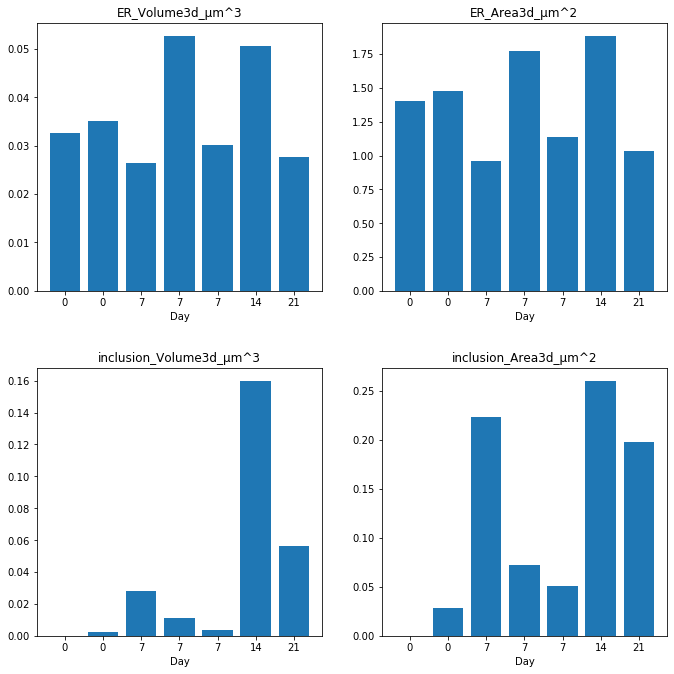

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled_normalized.index, 
                  df_sum_compiled_normalized.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_sum_compiled_normalized.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'ER_inclusion_normalized_totoal_volume_area.png'))
plt.show()

### 02-05 Compile mean volume of mito, cristate, ER and inclusion into one table
1. raw value
2. normalized by the total volume of cytoplasm

In [21]:
df_mean_compiled = pd.DataFrame()
df_mean_compiled[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
df_mean_compiled['day'] = df_mean_compiled['day'].astype('int8')
df_mean_compiled[['mito_Volume3d_µm^3', 'mito_Area3d_µm^2']] = df_mito_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_mean_compiled[['cristae_Volume3d_µm^3', 'cristae_Area3d_µm^2']] = df_cristae_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_mean_compiled[['ER_Volume3d_µm^3', 'ER_Area3d_µm^2']] = df_ER_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]

df_inclusion_mean_tmp = df_inclusion_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_inclusion_mean_fill = pd.DataFrame([[0, 0]], columns = ['Volume3d_µm^3', 'Area3d_µm^2'])
df_inclusion_mean_tmp = df_inclusion_mean_fill.append(df_inclusion_mean_tmp, ignore_index = True)

df_mean_compiled[['inclusion_Volume3d_µm^3', 'inclusion_Area3d_µm^2']] = df_inclusion_mean_tmp
df_mean_compiled

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,0.857091,6.612360,0.007178,0.545015,0.008055,0.346683,0.000000,0.000000
1,data_d00_batch02_loc03_cell_membrane.csv,0,0.456697,4.629633,0.008641,0.644417,0.007923,0.332775,0.177066,2.124593
2,data_d07_batch01_loc01_cell_membrane.csv,7,0.317044,2.994117,0.008099,0.599387,0.010043,0.366744,0.408255,3.228330
3,data_d07_batch02_loc01_cell_membrane.csv,7,0.472165,4.449912,0.012771,0.955298,0.020444,0.687477,0.428822,2.748817
4,data_d07_batch02_loc02_cell_membrane.csv,7,0.485281,5.256588,0.012152,0.882192,0.009553,0.359913,0.234703,3.350456
5,data_d14_batch01_loc01_cell_membrane.csv,14,0.857091,6.612360,0.007178,0.545015,0.019525,0.729028,10.144857,16.507230
6,data_d21_batch01_loc01_cell_membrane.csv,21,0.507236,4.497101,0.009326,0.697961,0.012410,0.462939,4.525678,15.804304


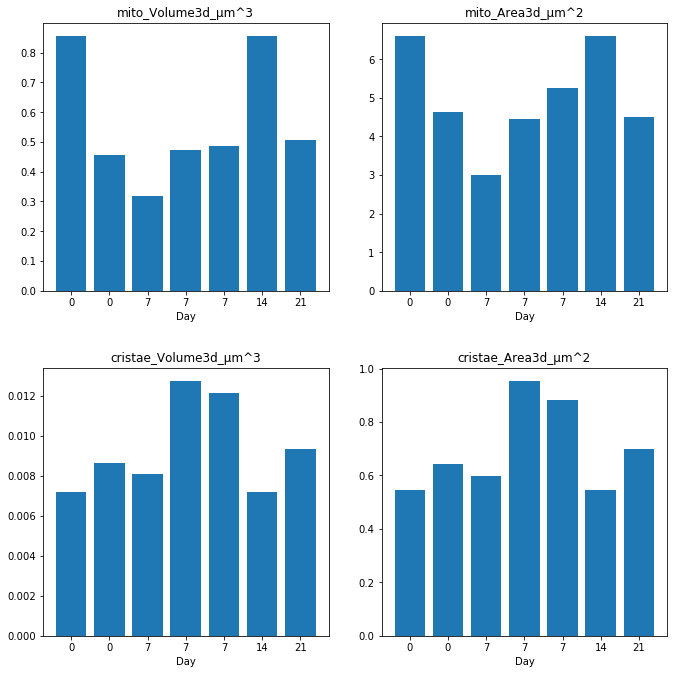

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_mean_compiled.index, 
                  df_mean_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_mean_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'mito_cristae_mean_volume_area.png'))
plt.show()

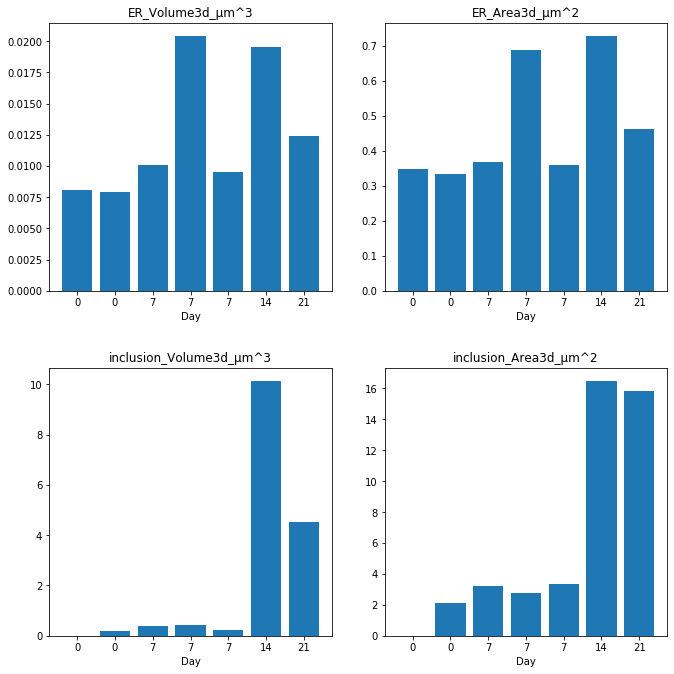

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_mean_compiled.index, 
                  df_mean_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '7', '7', '7', '14', '21'])
        ax[i, j].set_title(df_mean_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'ER_inclusion_mean_volume_area.png'))
plt.show()

In [24]:
'''
df_mean_compiled_normalized = pd.DataFrame()
df_mean_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
cal_tmp = df_mean_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)
df_mean_compiled_normalized = pd.concat([df_mean_compiled_normalized, cal_tmp], axis=1)
df_mean_compiled_normalized
'''

"\ndf_mean_compiled_normalized = pd.DataFrame()\ndf_mean_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]\ncal_tmp = df_mean_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)\ndf_mean_compiled_normalized = pd.concat([df_mean_compiled_normalized, cal_tmp], axis=1)\ndf_mean_compiled_normalized\n"

In [25]:
'''
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(5, 30))

for i in range(8):
    ax[i].bar(df_mean_compiled_normalized.index, 
              df_mean_compiled_normalized.iloc[:, i +2], 
              tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
    ax[i].set_title(df_mean_compiled_normalized.columns[i+2])
    ax[i].set_xlabel('Day')
    
fig.tight_layout(pad=3.0)
plt.show()
'''

"\nfig, ax = plt.subplots(nrows=8, ncols=1, figsize=(5, 30))\n\nfor i in range(8):\n    ax[i].bar(df_mean_compiled_normalized.index, \n              df_mean_compiled_normalized.iloc[:, i +2], \n              tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])\n    ax[i].set_title(df_mean_compiled_normalized.columns[i+2])\n    ax[i].set_xlabel('Day')\n    \nfig.tight_layout(pad=3.0)\nplt.show()\n"

### 02-06 Distribution

46.7896
0.005008


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


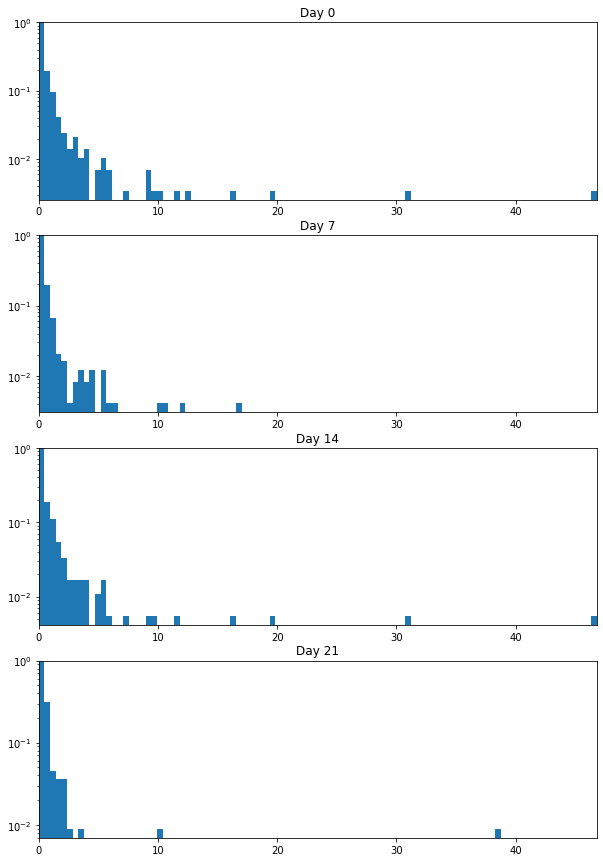

In [26]:
# mito
maxval = df_mito['Volume3d_µm^3'].max()
minval = df_mito['Volume3d_µm^3'].min()
print(maxval)
print(minval)
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 100)
# bins = np.linspace(500000000, minval + (maxval - minval)* 1, num = 50)
days = [0, 7, 14, 21]

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_mito.loc[df_mito['day'] == day, :]
    axes[i%nrows].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%nrows].set_xlim([0, maxval])
    axes[i%nrows].set_ylim([0, 1])
    axes[i%nrows].set_title('Day ' + str(day))
    
plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_mito_volume.png'))
plt.show()

1311.66
0.0003004190000000001


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


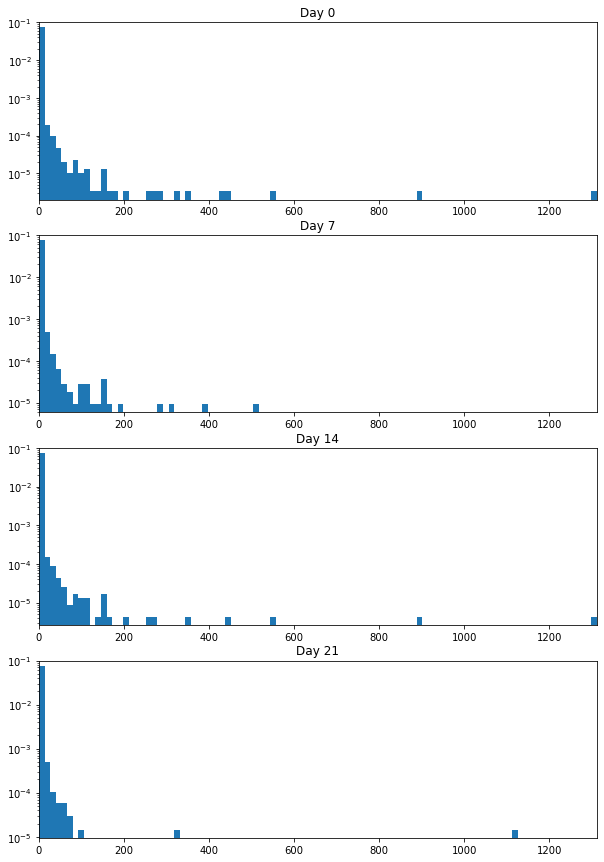

In [27]:
# cristae
maxval = df_cristae['Area3d_µm^2'].max()
minval = df_cristae['Area3d_µm^2'].min()
print(maxval)
print(minval)
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 100)
# bins = np.linspace(500000000, minval + (maxval - minval)* 1, num = 50)
days = [0, 7, 14, 21]

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_cristae.loc[df_cristae['day'] == day, :]
    axes[i%nrows].hist(df_tmp['Area3d_µm^2'], bins= bins, log=True, density = True)
    axes[i%nrows].set_xlim([0, maxval])
    axes[i%nrows].set_ylim([0, 0.1])
    axes[i%nrows].set_title('Day ' + str(day))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_cristae_volume.png'))
plt.show()

86.4886
1e-06


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


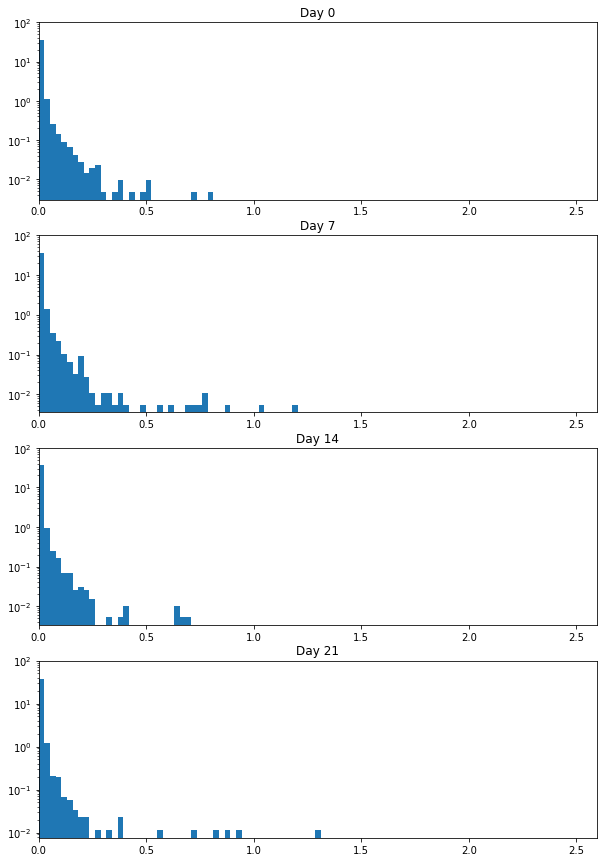

In [28]:
# ER
maxval = df_ER['Volume3d_µm^3'].max()
minval = df_ER['Volume3d_µm^3'].min()
print(maxval)
print(minval)
factor = 0.03

bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* factor, num = 100)
days = [0, 7, 14, 21]


nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_ER.loc[df_ER['day'] == day, :]
    axes[i%nrows].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%nrows].set_xlim([0, minval + (maxval - minval)* factor])
    axes[i%nrows].set_ylim([0, 100])
    axes[i%nrows].set_title('Day ' + str(day))
    
plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_ER_volume.png'))
plt.show()

261.036
1e-06


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


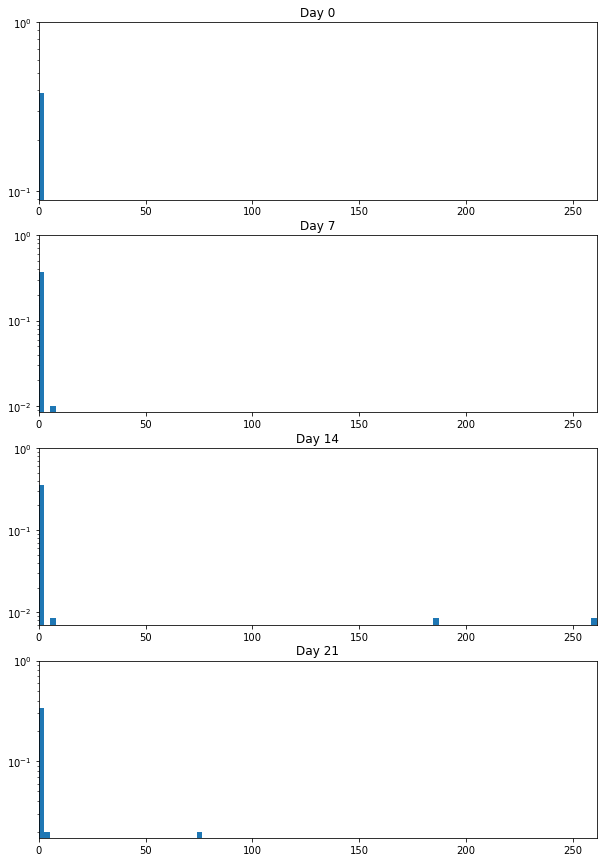

In [29]:
# inclusion
maxval = df_inclusion['Volume3d_µm^3'].max()
minval = df_inclusion['Volume3d_µm^3'].min()
print(maxval)
print(minval)
factor = 1

bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* factor, num = 100)
days = [0, 7, 14, 21]

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_inclusion.loc[df_inclusion['day'] == day, :]
    axes[i%nrows].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%nrows].set_xlim([0, minval + (maxval - minval)* factor])
    axes[i%nrows].set_ylim([0, 1])
    axes[i%nrows].set_title('Day ' + str(day))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_inclusion_volume.png'))
plt.show()

# 03 Load Data from Auto Skeletonization of Mitocondria

## 03-01

In [30]:
mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

path = os.path.join(mainpath, folder, data_folder)
print(path)

folders = ['skeleton_output']
subcat = ['nodes', 'points', 'segments_s']

D:\PerlmutterData\segmentation_compiled_export\data


In [31]:
target_list = glob.glob(os.path.join(path, 'compile', '*.csv'))
target_list = [os.path.basename(x) for x in target_list]
target_list = [os.path.splitext(x)[0] for x in target_list]
print(target_list)

['cell_membrane', 'cristae', 'ER', 'inclusion', 'mito', 'nodes', 'nucleus', 'points', 'segments_s']


In [32]:
file_meta = {
    'data_d00_batch01_loc01': 0,
    'data_d00_batch02_loc02': 0,
    'data_d00_batch02_loc03': 0,
    'data_d07_batch01_loc01': 7, 
    'data_d07_batch02_loc01': 7,
    'data_d07_batch02_loc02': 7, 
    'data_d14_batch01_loc01': 14, 
    'data_d17_batch01_loc01': 17,
    'data_d21_batch01_loc01': 21,
}

In [33]:
for i in subcat:
    file_list = glob.glob(os.path.join(path, 'raw', 'skeleton_output', '*', i + '.csv'))
    # print(file_list)
    
    if not i in target_list:
        df = pd.DataFrame()

        for j in file_list:    
            data_temp = pd.read_csv(j, header = 0)
            
            foldername_tmp = os.path.dirname(j)
            foldername_tmp = os.path.basename(foldername_tmp)
            
            
            # add day
            pattern = re.compile("data_d[0-9][0-9]_batch[0-9][0-9]_loc[0-9][0-9]")
            original_foldername = pattern.search(foldername_tmp).group(0)
            day_tmp = file_meta[original_foldername]
            data_temp['day'] = day_tmp
             # add filename
            data_temp['filename'] = original_foldername
            
            df = df.append(data_temp, ignore_index = True)
            
        display(df)
        df.to_csv(os.path.join(path, 'compile', i + '.csv'))

In [34]:
df_points = pd.read_csv(os.path.join(path, 'compile', 'points' + '.csv'))
df_segments = pd.read_csv(os.path.join(path, 'compile', 'segments_s' + '.csv'))
df_nodes = pd.read_csv(os.path.join(path, 'compile', 'nodes' + '.csv'))

In [35]:
df_points

,Unnamed: 0,Point ID,thickness,X Coord,Y Coord,Z Coord,day,filename
0,0,0,146.666611,3615.000000,1057.265259,15.000000,0,data_d00_batch01_loc01
1,1,1,132.923523,3653.614258,1073.964844,54.746948,0,data_d00_batch01_loc01
2,2,2,128.812210,3690.851562,1067.280884,94.195908,0,data_d00_batch01_loc01
3,3,3,126.041779,3723.958008,1070.612793,132.794861,0,data_d00_batch01_loc01
4,4,4,119.011536,3746.043945,1087.291382,169.163361,0,data_d00_batch01_loc01
...,...,...,...,...,...,...,...,...
137623,137623,10531,40.069736,3801.335449,616.077209,19489.582030,21,data_d21_batch01_loc01
137624,137624,10532,42.030777,3812.771484,655.943237,19473.111330,21,data_d21_batch01_loc01
137625,137625,10533,54.533207,3820.230469,695.924194,19445.185550,21,data_d21_batch01_loc01
137626,137626,10534,62.743324,3831.202637,735.947632,19417.974610,21,data_d21_batch01_loc01


In [36]:
for omit in omit_data: 
    df_points = df_points.loc[df_points['filename']!= omit]
    df_segments = df_segments.loc[df_segments['filename']!=omit]
    df_nodes = df_nodes.loc[df_nodes['filename']!=omit]

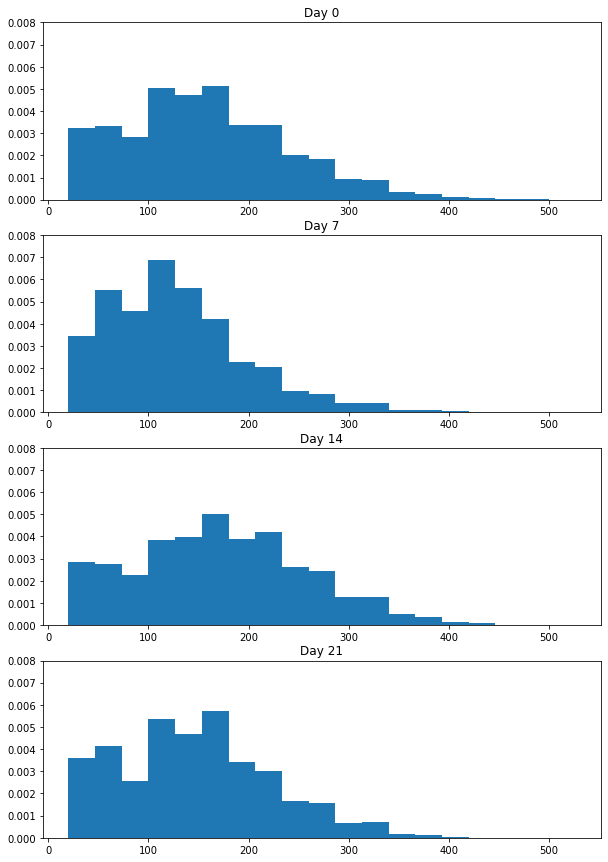

In [37]:
# points
maxval = df_points['thickness'].max()
minval = df_points['thickness'].min()
days = [0, 7, 14, 21]
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 20)

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_points.loc[df_points['day'] == day, :]
    axes[i%nrows].hist(df_tmp['thickness'], bins= bins, log=False, density = True)
    axes[i%nrows].set_ylim([0, 0.008])
    axes[i%nrows].set_title('Day ' + str(day))
    
plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_points_thickness.png'))
plt.show()

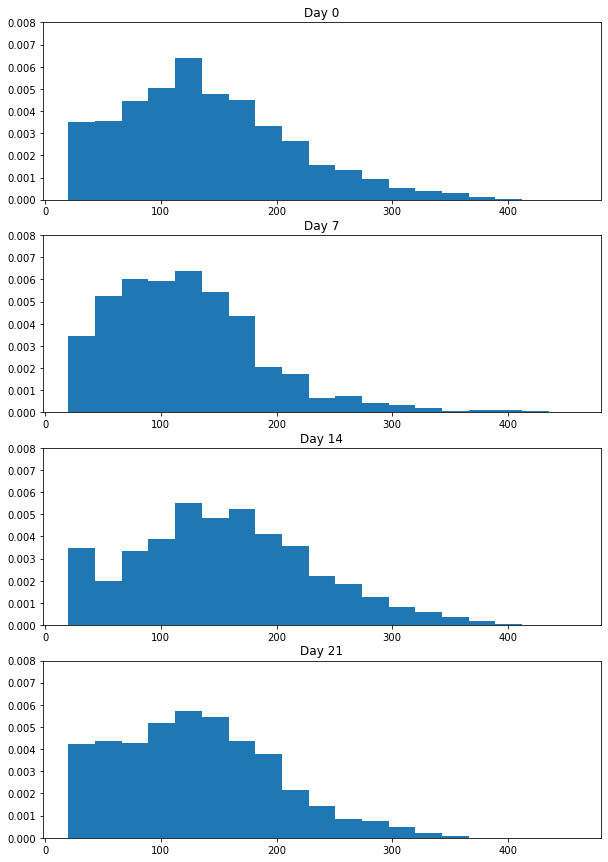

In [38]:
# segments
maxval = df_segments['thickness'].max()
minval = df_segments['thickness'].min()
days = [0, 7, 14, 21]
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 20)

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_segments.loc[df_segments['day'] == day, :]
    axes[i%nrows].hist(df_tmp['thickness'], bins= bins, log=False, density = True)
    axes[i%nrows].set_ylim([0, 0.008])
    axes[i%nrows].set_title('Day ' + str(day))
    
plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'distribution_segments_thickness.png'))
plt.show()

In [39]:
df_segments_count_grouped = df_nodes.groupby(['day', 'filename', 'Coordination Number']).count().reset_index()
df_segments_count_grouped

,day,filename,Coordination Number,Unnamed: 0,Node ID,X Coord,Y Coord,Z Coord
0,0,data_d00_batch01_loc01,1,452,452,452,452,452
1,0,data_d00_batch01_loc01,3,601,601,601,601,601
2,0,data_d00_batch01_loc01,4,111,111,111,111,111
3,0,data_d00_batch01_loc01,5,20,20,20,20,20
4,0,data_d00_batch01_loc01,6,13,13,13,13,13
5,0,data_d00_batch01_loc01,7,2,2,2,2,2
6,0,data_d00_batch01_loc01,8,4,4,4,4,4
7,0,data_d00_batch01_loc01,9,2,2,2,2,2
8,0,data_d00_batch01_loc01,11,1,1,1,1,1
9,0,data_d00_batch01_loc01,16,1,1,1,1,1


In [40]:
filename = df_segments_count_grouped['filename'].unique()
print(filename)

['data_d00_batch01_loc01' 'data_d00_batch02_loc03'
 'data_d07_batch01_loc01' 'data_d07_batch02_loc01'
 'data_d07_batch02_loc02' 'data_d14_batch01_loc01'
 'data_d17_batch01_loc01' 'data_d21_batch01_loc01']


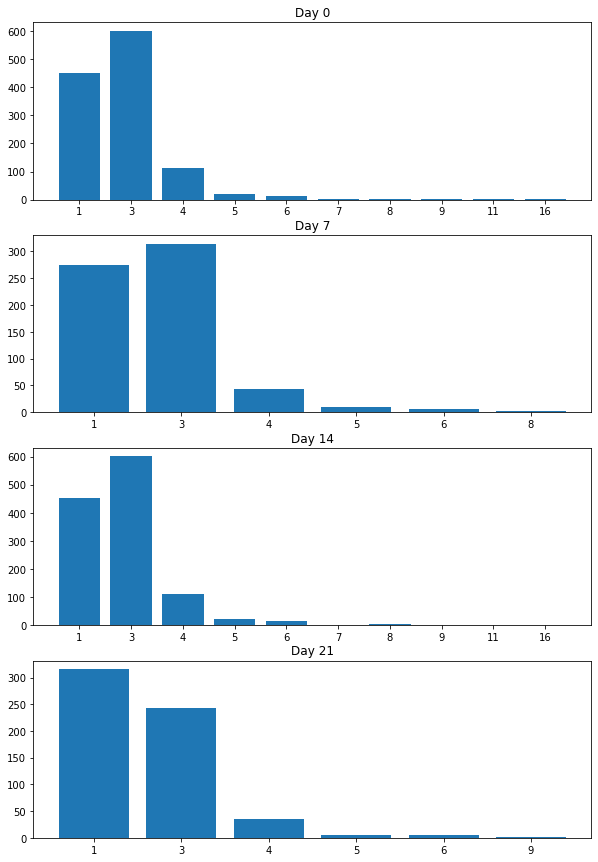

In [41]:
days = [0, 7, 14, 21]

nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_segments_count_grouped.loc[df_segments_count_grouped['day'] == day]
    
    x = df_tmp['Coordination Number']
    y = df_tmp['Node ID']
    x_pos = [str(i) for i in x]
    
    axes[i%nrows].bar(x_pos, y)
    axes[i%nrows].set_title('Day ' + str(day))
    
plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'coordination_number.png'))
plt.show()

# 04 Average of total size

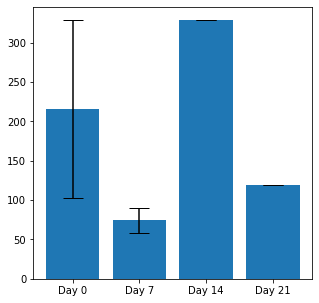

In [42]:
mito_mean = df_mito_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).mean().reset_index()
mito_sem = df_mito_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).sem().reset_index()
mito_sem = mito_sem.fillna(0)

mito_mean.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'mito_mean.csv'))
mito_sem.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'mito_sem.csv'))

fig = plt.figure(figsize=(5, 5))
x = ['Day 0', 'Day 7', 'Day 14', 'Day 21']
plt.bar(x, mito_mean['Volume3d_µm^3'], yerr= mito_sem['Volume3d_µm^3'], error_kw=dict(capsize=10))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'mito_mean_barplot.png'))
plt.show()

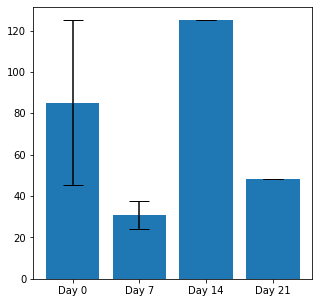

In [43]:
cristae_mean = df_cristae_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).mean().reset_index()
cristae_sem = df_cristae_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).sem().reset_index()
cristae_sem = cristae_sem.fillna(0)

cristae_mean.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cristae_mean.csv'))
cristae_sem.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'cristae_sem.csv'))

fig = plt.figure(figsize=(5, 5))
x = ['Day 0', 'Day 7', 'Day 14', 'Day 21']
plt.bar(x, cristae_mean['Volume3d_µm^3'], yerr= cristae_sem['Volume3d_µm^3'], error_kw=dict(capsize=10))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'cristae_mean_barplot.png'))
plt.show()

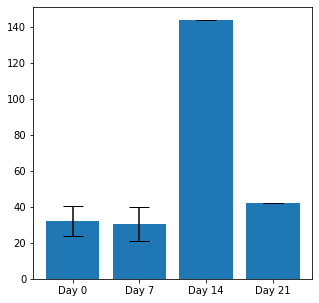

In [44]:
ER_mean = df_ER_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).mean().reset_index()
ER_sem = df_ER_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).sem().reset_index()
ER_sem = ER_sem.fillna(0)

ER_mean.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'ER_mean.csv'))
ER_sem.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'ER_sem.csv'))

fig = plt.figure(figsize=(5, 5))
x = ['Day 0', 'Day 7', 'Day 14', 'Day 21']
plt.bar(x, ER_mean['Volume3d_µm^3'], yerr= ER_sem['Volume3d_µm^3'], error_kw=dict(capsize=10))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'ER_mean_barplot.png'))
plt.show()

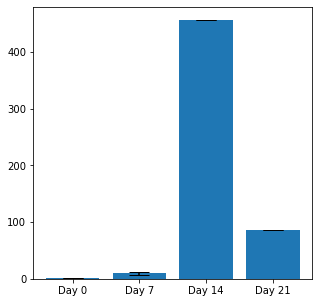

In [45]:
inclusion_mean = df_inclusion_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).mean().reset_index()
inclusion_sem = df_inclusion_sum_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).sem().reset_index()
inclusion_sem = inclusion_sem.fillna(0)

inclusion_mean.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'inclusion_mean.csv'))
inclusion_sem.to_csv(os.path.join(mainpath, folder, data_folder, 'spreadsheet', 'inclusion_sem.csv'))

fig = plt.figure(figsize=(5, 5))
x = ['Day 0', 'Day 7', 'Day 14', 'Day 21']
plt.bar(x, inclusion_mean['Volume3d_µm^3'], yerr= inclusion_sem['Volume3d_µm^3'], error_kw=dict(capsize=10))

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plots', 'inclusion_mean_barplot.png'))
plt.show()